In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
%matplotlib inline

# Development of CO2 Emissions in an era of Global Warming

We are living in a time where climate change and global warming is present in our social and political discussions.
Therefore let us look into one data set and see what we can derive from it to support these discussion with actual numbers.

For this analytical report we use the following data set from the UN:
**Carbon dioxide (CO2) Emissions without Land Use, Land-Use Change and Forestry (LULUCF)[[Source]](http://data.un.org/Data.aspx?d=GHG&f=seriesID%3aCO2)**

To understand this data set we need to grasp what LULUCF is. Here is the explanation of the UN:

"The rate of build-up of CO2 in the atmosphere can be reduced by taking advantage of the fact that atmospheric CO2 can accumulate as carbon in vegetation and soils in terrestrial ecosystems. Under the United Nations Framework Convention on Climate Change any process, activity or mechanism which removes a greenhouse gas from the atmosphere is referred to as a "sink". Human activities impact terrestrial sinks, through land use, land-use change and forestry (LULUCF) activities, consequently, the exchange of CO2 (carbon cycle) between the terrestrial biosphere system and the atmosphere is altered."[[Source]](https://unfccc.int/topics/land-use/workstreams/land-use--land-use-change-and-forestry-lulucf)

This means in the data set we deal with the C02 emission that was actually emit from human made things without  the account of LULUCF.

Let's dive into the data set!

In [2]:
df = pd.read_csv('UNdata_Export_20190308_113825082.csv')
print('Samples:\n', df.sample(5))
print('\nContaining Countries and Areas: \n', df['Country or Area'].unique())
print('Country & Area Count: ', len(df['Country or Area'].unique()))
df.describe()

Samples:
     Country or Area  Year          Value
807          Norway  1992   34831.892591
217  Czech Republic  2015  104784.557947
585          Latvia  1998    8328.911440
618   Liechtenstein  1992     206.949455
656      Luxembourg  2008   11132.259840

Containing Countries and Areas: 
 ['Australia' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada' 'Croatia'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'European Union' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta' 'Monaco'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russian Federation' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'United States of America']
Country & Area Count:  43


,Year,Value
count,1161.000000,1.161000e+03
mean,2003.000000,4.295279e+05
std,7.792238,1.054467e+06
min,1990.000000,6.695821e+01
25%,1996.000000,2.378530e+04
50%,2003.000000,6.229223e+04
75%,2010.000000,3.364901e+05
max,2016.000000,6.132006e+06


We have values representing in kilotonne CO2 equivalent starting from year 1990 to 2016 from 43 countries/areas.
Because we have large countries like U.S. and small countries like Iceland in that data set, the variance is quite high, which is fine. Unfortunately a lot of other countries in the world are missing like China. 

# Overall Emission
To get a first impression let's plot the summed emission of all these countries/areas. **Does the emission increase overtime?** This assumes the increasing CO2 emission in the last years fuels Climate Change. 

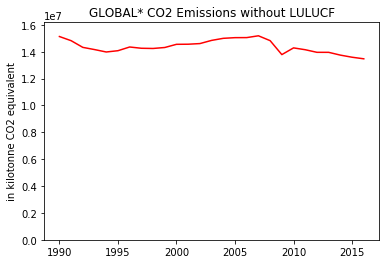

In [3]:
df_without_EU = df[df['Country or Area'] != 'European Union'] # Without bc for example Germany would duplicated 
sum_per_year = df_without_EU.groupby('Year').aggregate(np.sum)

plt.plot(sum_per_year['Value'], color='red')
plt.ylim([0, max(sum_per_year['Value']) + 1000000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('GLOBAL* CO2 Emissions without LULUCF')
plt.show()

The plot shows more a plateau with decreasing CO2 emission since the financial crisis of 2008/09. You even can see the kink in the graph. Our assumption with an increasing emission is wrong. This is not answering if there should be an increasing emission for Climate Change and it won't be answered here.

**Are all these countries reducing their CO2 emission?**
To have a better picture of these differences, the next chart plots individual countries/areas.

# Country-specific Emission

In [4]:
us_data = df[df['Country or Area'] == 'United States of America']
australia_data = df[df['Country or Area'] == 'Australia']
austria_data = df[df['Country or Area'] == 'Austria']
uk_data = df[df['Country or Area'] == 'United Kingdom']
ger_data = df[df['Country or Area'] == 'Germany']
ice_data = df[df['Country or Area'] == 'Iceland']
fin_data = df[df['Country or Area'] == 'Finland']
rus_data = df[df['Country or Area'] == 'Russian Federation']
ch_data = df[df['Country or Area'] == 'Switzerland']

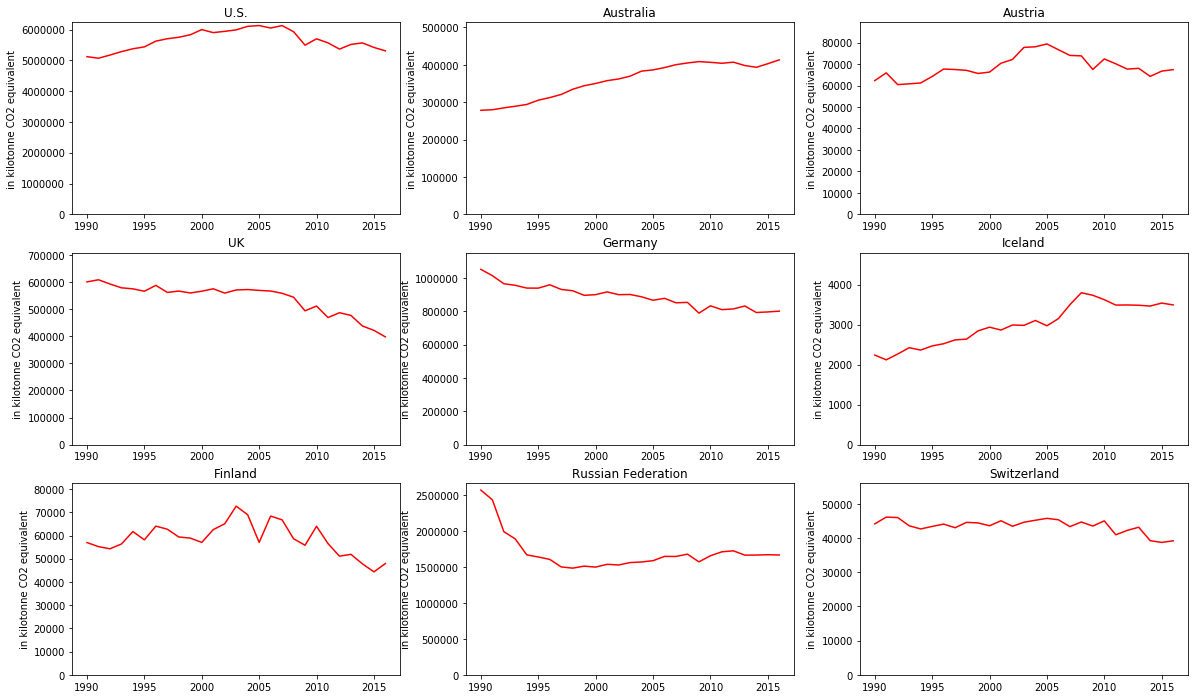

In [5]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
plt.plot(us_data['Year'], us_data['Value'], color='red')
plt.ylim([0, max(us_data['Value']) + 100000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('U.S.')

plt.subplot(3, 3, 2)
plt.plot(australia_data['Year'], australia_data['Value'], color='red')
plt.ylim([0, max(australia_data['Value']) + 100000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Australia')

plt.subplot(3, 3, 3)
plt.plot(austria_data['Year'], austria_data['Value'], color='red')
plt.ylim([0, max(austria_data['Value']) + 10000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Austria')

plt.subplot(3, 3, 4)
plt.plot(uk_data['Year'], uk_data['Value'], color='red')
plt.ylim([0, max(uk_data['Value']) + 100000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('UK')

plt.subplot(3, 3, 5)
plt.plot(ger_data['Year'], ger_data['Value'], color='red')
plt.ylim([0, max(ger_data['Value']) + 100000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Germany')

plt.subplot(3, 3, 6)
plt.plot(ice_data['Year'], ice_data['Value'], color='red')
plt.ylim([0, max(ice_data['Value']) + 1000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Iceland')

plt.subplot(3, 3, 7)
plt.plot(fin_data['Year'], fin_data['Value'], color='red')
plt.ylim([0, max(fin_data['Value']) + 10000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Finland')

plt.subplot(3, 3, 8)
plt.plot(rus_data['Year'], rus_data['Value'], color='red')
plt.ylim([0, max(rus_data['Value']) + 100000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Russian Federation')

plt.subplot(3, 3, 9)
plt.plot(ch_data['Year'], ch_data['Value'], color='red')
plt.ylim([0, max(ch_data['Value']) + 10000])
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Switzerland')


plt.show()

Most countries indeed decrease their CO2 emission like UK, Germany, Switzerland, Finland. Australia and Iceland increased their emission overtime and showing an anti-pattern. 

These charts show the emission development over time but they are not useful to compare countries on absolute numbers. Let's solve this issue:

**Which country has the most CO2 emission and who is following?**

# Emission comparison 

In [6]:
all_data_2016 = df[df['Year'] == 2016].sort_values(by='Value',ascending=False)

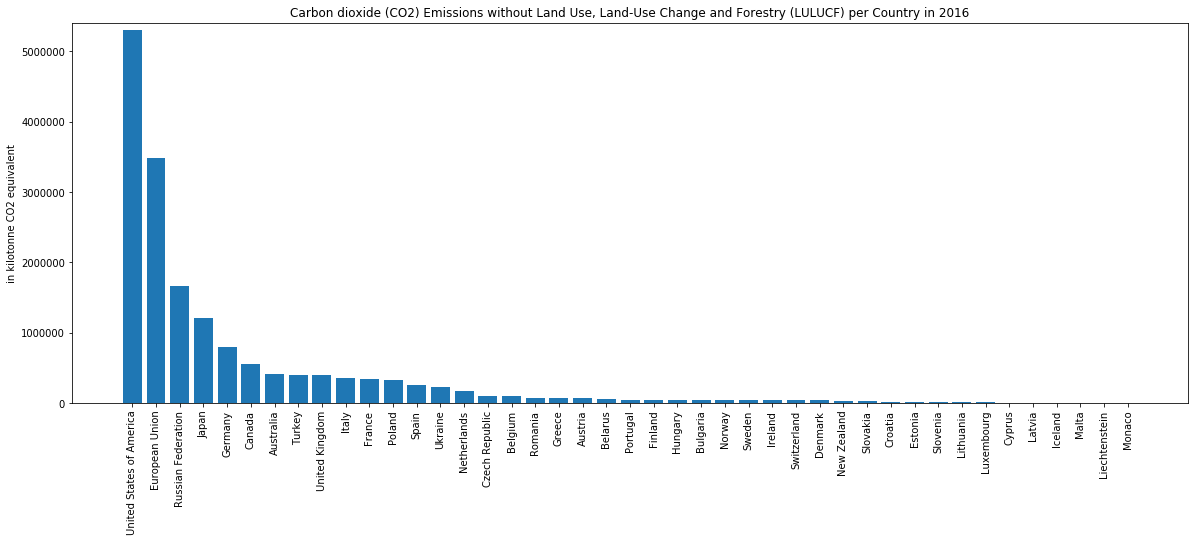

In [7]:
plt.figure(figsize=(20, 7))
plt.bar(all_data_2016['Country or Area'], all_data_2016['Value'])
plt.ylim([0, max(all_data_2016['Value']) + 100000])
plt.xticks(rotation=90)
plt.ylabel('in kilotonne CO2 equivalent')
plt.title('Carbon dioxide (CO2) Emissions without Land Use, Land-Use Change and Forestry (LULUCF) per Country in 2016')
plt.show()

You can now compare the CO2 emission between countries. For better comparison the countries are sorted from the highest emission to the lowest.

U.S. at the 1st place, followed by the EU and Russia. 

## Conclusion

* We generally have a downward trend. There is no answer if it is enough to prevent Climate Change.
* If U.S., the EU and Russia really change the their game it would have big inpact to the overall global* emission. 
* There is a lot room for improvement. We still emit million and billion tonne of CO2.

## Research Proposal

To make more general conclusions about Climate Change and Global Warming, more scientific inside is needed. That is what we should to next: 
1. Get data for 2017, 2018 and other missing countries and rerun the report.
2. Check if the findings will still supported and challenge hypothesis again. 
3. Inspect data of other Greenhouse Gases. CO2 is one Greenhouse Gas of many. 
4. Connect the data with measured temperatures on Earth to find out correlation. 

**Are all these gases driver of Climate Change and where to start taking action?**